In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

wine = pd.read_csv('winequality-red.csv')

In [5]:
#if the wine has a quality higher than 6 then it is considered good
wine['quality'] = pd.cut(wine['quality'], bins = [0, 6.5, float('Inf')], labels = [float(1), float(0)])

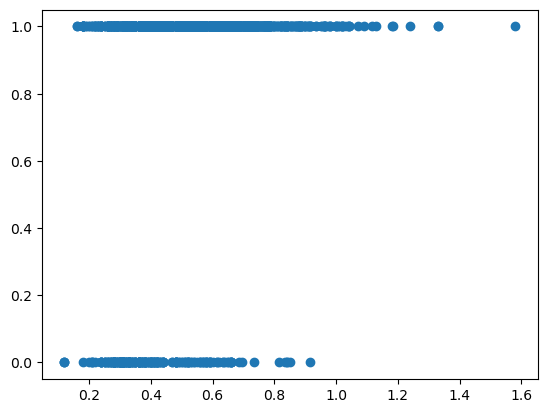

In [6]:
quality = wine['quality']
volatile_acidity = wine['volatile acidity']
plt.scatter(volatile_acidity, quality)


KeyboardInterrupt: 

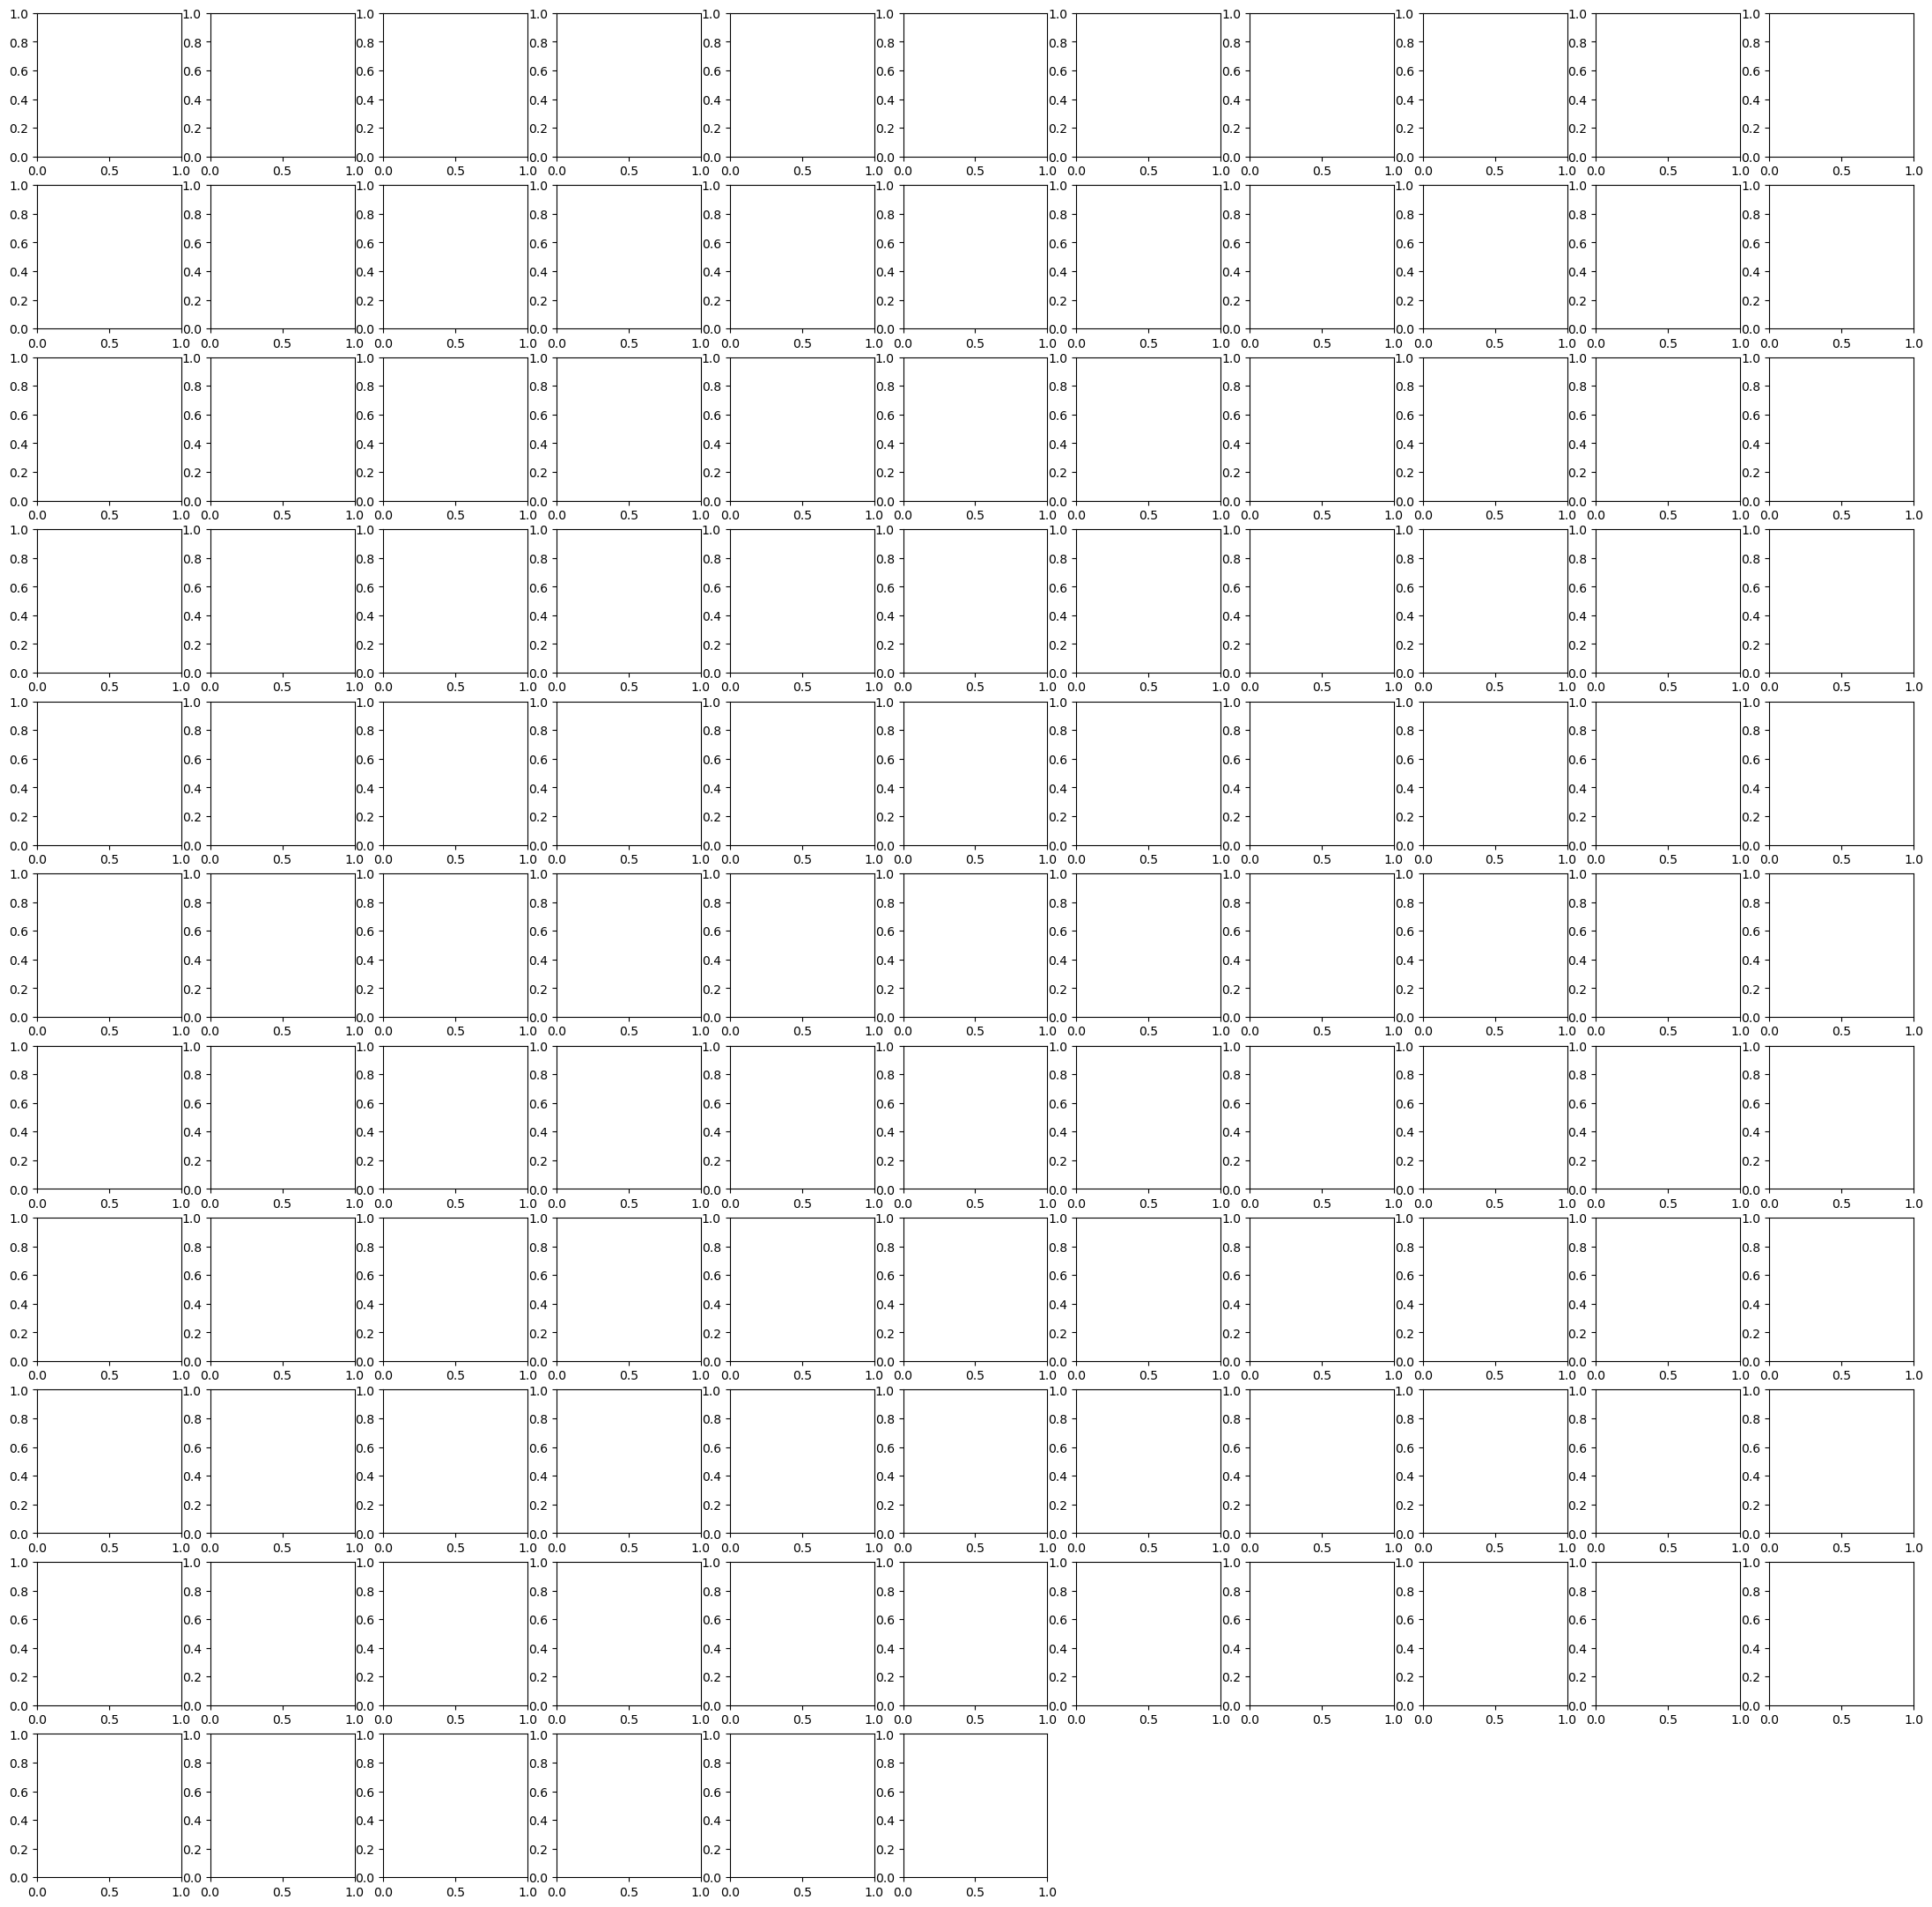

In [7]:
g = sns.PairGrid(wine)
g.map(sns.scatterplot)

c:\Users\Zac\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


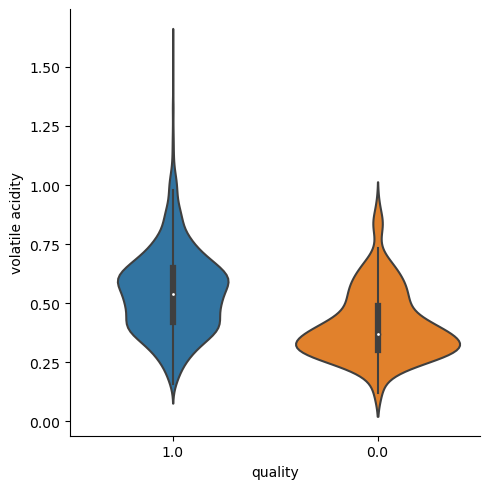

In [8]:
sns.catplot(x = "quality", y = "volatile acidity",
            kind = "violin", data = wine)
plt.show()